Разделим данные по id водителей

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pandas
import matplotlib.pyplot as plt
from datetime import datetime as dt

data = pandas.read_csv('data1.tsv', sep="\t")

drivers_data = []

date_fmt = "%Y-%m-%d %H:%M:%S"

for i in data["id"].unique():
    str_dates = data[data["id"] == i]["date"]
    
    lat = [l for l in data[data["id"] == i]["latitude"]]
    lon = [l for l in data[data["id"] == i]["longitude"]]
    timestamps = [dt.strptime(str_date, date_fmt) for str_date in str_dates]
    
    drivers_data.append([lat, lon, timestamps])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Разбиваем все точки на отдельные круги.

In [4]:
from split_rounds import split_rounds

rounds = []
        
for xs, ys, timestamps in drivers_data:
    driver_rounds = split_rounds(xs, ys, timestamps)
    rounds.extend(driver_rounds)
    
    
    

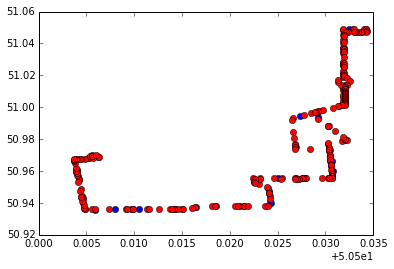

In [8]:
xs, ys, ts = zip(*rounds[0])
plt.plot(xs, ys, 'o', c ='b')
xs, ys, ts = zip(*rounds[7])
plt.plot(xs, ys, 'o', c = 'r')

Этот график проверка, что данные отделяются верно. Ещё не много стоит его доработать.

In [34]:
from split_rounds import mean_stay

mean_stays_rounds = mean_stay(rounds)
print(len(mean_stays_rounds), len (rounds))

15 55
